
# Group Project in AI Applied to Engineering

##### Nima Salihzada, Tarjei Åkre Reite and Sanna Hartman Sellaeg

This notebook contains the code used to carry out the group work at the AI Applied to Engineering course.

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Alzheimer's disease data

The dataset we are working with is a dataset containing medical data from just over 2100 patients, of whom some have been diagnosed with Alzheimer's disease.
The data was retrieved from: https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset?resource=download


In [32]:
df = pd.read_csv("alzheimers_disease_data.csv")
df.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,620.507185,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5288.000000,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5825.000000,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6362.000000,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
df = df.drop(columns=["PatientID", "DoctorInCharge"])


In [34]:
correlation_matrix = df.corr()

/var/folders/qw/2f_1rvc12n1fsv77zfglk47c0000gn/T/ipykernel_13350/1531856245.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_values.index, y=corr_values.values, palette="coolwarm")


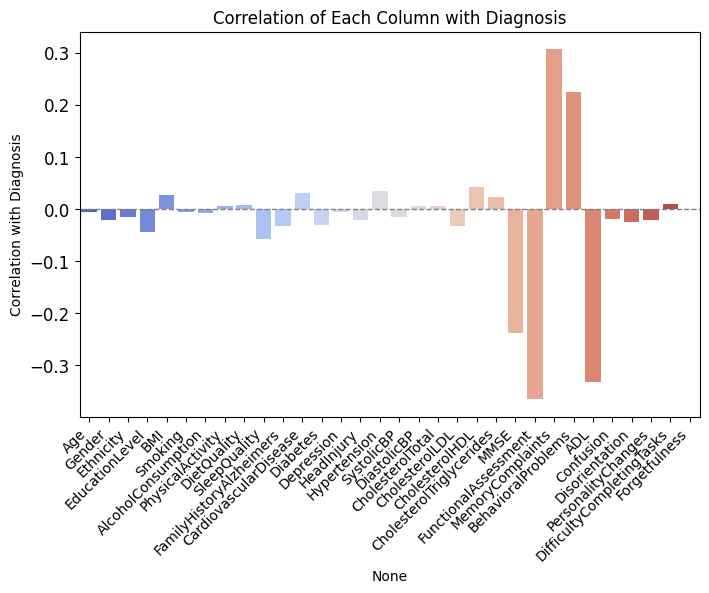

In [35]:
corr_values = df.corr()["Diagnosis"].drop("Diagnosis") 

plt.figure(figsize=(8, 5))
sns.barplot(x=corr_values.index, y=corr_values.values, palette="coolwarm")

# Add labels and title
plt.axhline(0, color='gray', linestyle='--', linewidth=1)  # Add a zero reference line
plt.ylabel('Correlation with ' + "Diagnosis")
plt.title('Correlation of Each Column with ' + "Diagnosis")
plt.xticks(rotation=45, ha='right', fontsize=10)  # Adjust rotation, alignment, and size
plt.yticks(fontsize=12)  # Adjust y-axis font size

plt.show()

In [36]:
print(df.head)
print(df['BMI'].dtypes)
print(df.isnull().sum())


<bound method NDFrame.head of       Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0      73       0          0               2  22.927749        0   
1      89       0          0               0  26.827681        0   
2      73       0          3               1  17.795882        0   
3      74       1          0               1  33.800817        1   
4      89       0          0               0  20.716974        0   
...   ...     ...        ...             ...        ...      ...   
2144   61       0          0               1  39.121757        0   
2145   75       0          0               2  17.857903        0   
2146   77       0          0               1  15.476479        0   
2147   78       1          3               1  15.299911        0   
2148   72       0          0               2  33.289738        0   

      AlcoholConsumption  PhysicalActivity  DietQuality  SleepQuality  ...  \
0              13.297218          6.327112     1.347214      9.025679  ... 